<a href="https://colab.research.google.com/github/NavdeepTU/Deep-Learning/blob/main/02.%20ML%20basics%20with%20Keras/05.%20Basic_regression_Predict_fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# make numpy printout easier to read
np.set_printoptions(precision = 3, suppress = True)

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names = column_names,
                          na_values = '?', comment = '\t',
                          sep = ' ', skipinitialspace = True)

In [3]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
# clean the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
# one hot encoding of origin column
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [7]:
dataset = pd.get_dummies(dataset, columns = ['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [8]:
# split the data into training and test sets
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

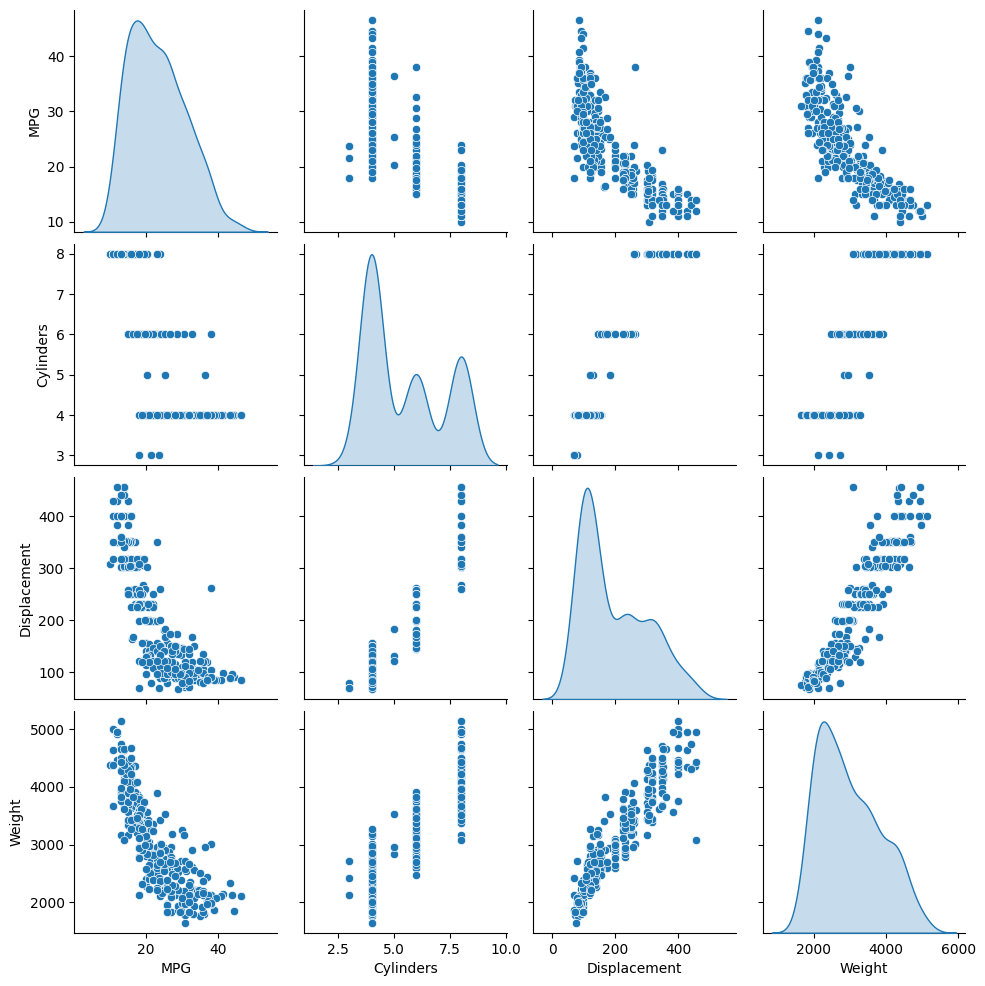

In [9]:
# inspect the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind = 'kde')

In [10]:
# checking overall statistics
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [11]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [12]:
# normalization
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [13]:
normalizer = tf.keras.layers.Normalization(axis = -1)

In [14]:
normalizer.adapt(np.array(train_features))

In [15]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [16]:
first = np.array(train_features[:1])

with np.printoptions(precision = 2, suppress = True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [17]:
# linear regression

In [18]:
# linear regression with one variable

horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = tf.keras.layers.Normalization(input_shape = [1,], axis = None)
horsepower_normalizer.adapt(horsepower)

In [19]:
# build the keras sequential model

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(units = 1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [20]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 146ms/step


array([[ 1.045],
       [ 0.59 ],
       [-1.928],
       [ 1.464],
       [ 1.324],
       [ 0.52 ],
       [ 1.569],
       [ 1.324],
       [ 0.345],
       [ 0.59 ]], dtype=float32)

In [21]:
horsepower_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_absolute_error'
)

In [22]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs = 100,
    # Suppress logging
    verbose = 0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2
)

CPU times: user 6.43 s, sys: 172 ms, total: 6.61 s
Wall time: 11.6 s


In [23]:
# Visualize the model's training progress using the stats stored in the history object

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.803525,4.175765,95
96,3.805547,4.197764,96
97,3.803312,4.184165,97
98,3.802538,4.182964,98
99,3.805927,4.204048,99


In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

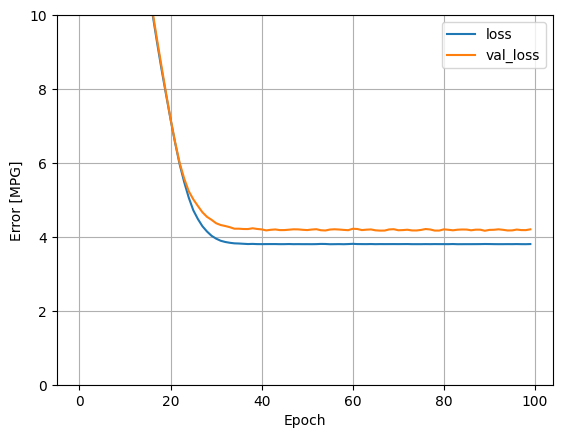

In [25]:
plot_loss(history)

In [26]:
# collect the results of test set for later
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose = 0
)

In [27]:
# Since this is a single variable regression,
# it's easy to view the model's predictions as a function of the input

x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 3ms/step


In [28]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label = 'Data')
  plt.plot(x, y, color = 'k', label = 'Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

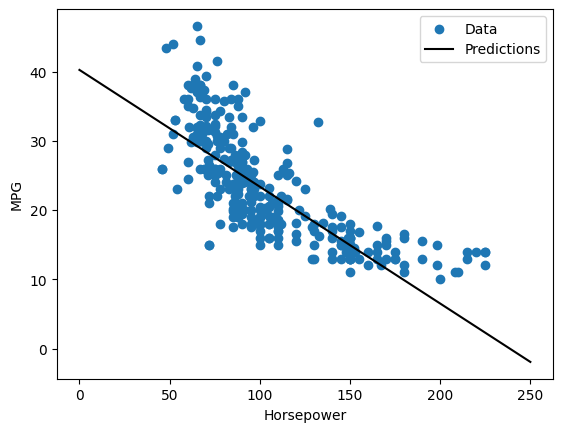

In [29]:
plot_horsepower(x, y)

In [30]:
# Linear regression with multiple inputs

linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units = 1)
])

In [31]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 250ms/step


array([[ 0.073],
       [ 0.315],
       [-1.247],
       [ 1.312],
       [ 1.089],
       [ 0.324],
       [ 1.187],
       [ 0.434],
       [-0.313],
       [-0.162]], dtype=float32)

In [32]:
linear_model.layers[1].kernel.shape # weight matrix shape

TensorShape([9, 1])

In [33]:
linear_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_absolute_error'
)

In [34]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs = 100,
    # Suppress logging
    verbose = 0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2
)

CPU times: user 6.99 s, sys: 187 ms, total: 7.18 s
Wall time: 21.5 s


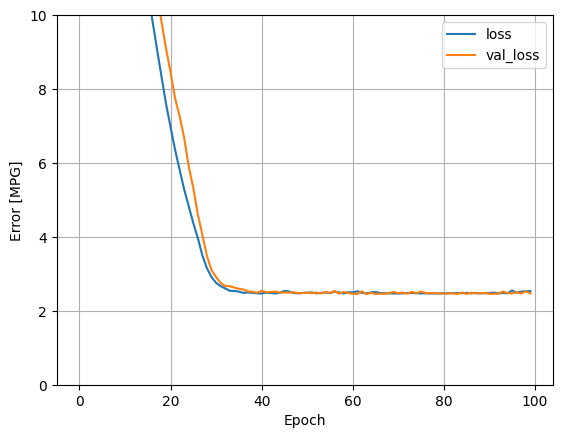

In [35]:
plot_loss(history)

In [36]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose = 0
)

In [37]:
# Regression with deep neural network

def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(1)
  ])

  model.compile(
      loss = 'mean_absolute_error',
      optimizer = tf.keras.optimizers.Adam(0.001)
  )

  return model

In [38]:
# regression using a DNN and a single input

dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [39]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [40]:
# train the model

%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split = 0.2,
    verbose = 0,
    epochs = 100
)

CPU times: user 7.55 s, sys: 181 ms, total: 7.73 s
Wall time: 13.9 s


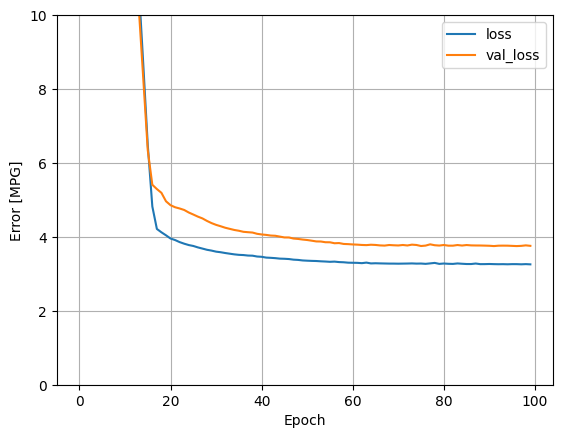

In [41]:
# the model does slightly better than the linear single-input horsepower_model
plot_loss(history)

In [42]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 5ms/step


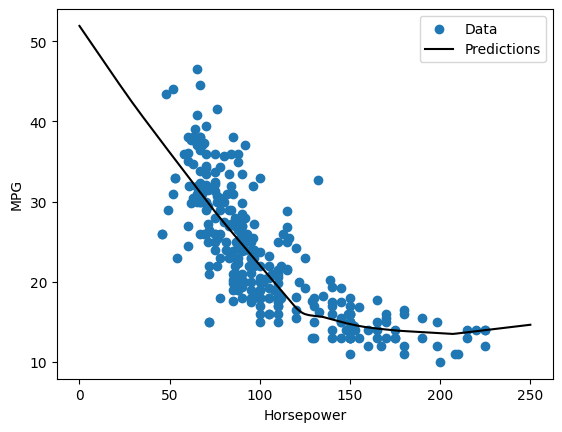

In [43]:
plot_horsepower(x, y)

In [44]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose = 0
)

In [45]:
# Regression using a DNN and multiple inputs

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [46]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 5.38 s, sys: 201 ms, total: 5.58 s
Wall time: 6.29 s


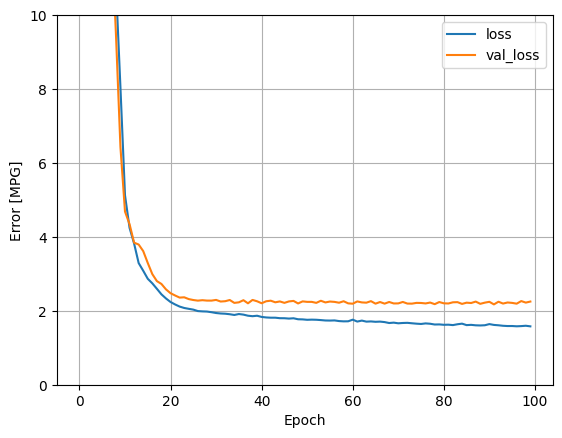

In [47]:
plot_loss(history)

In [48]:
# collect the results on test set
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [49]:
# Performance
# Since all models have been trained, you can review their test set performance:

pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.649791
linear_model,2.479754
dnn_horsepower_model,2.922305
dnn_model,1.675824


3/3 [==============================] - 0s 6ms/step


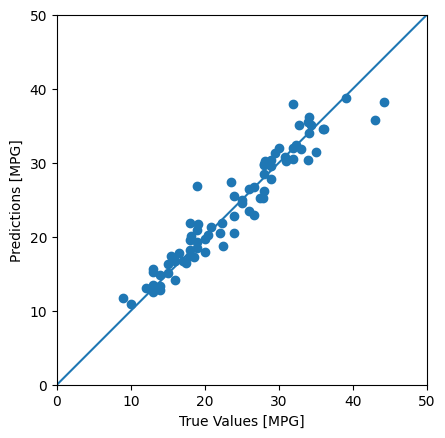

In [52]:
# Make predictions

test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

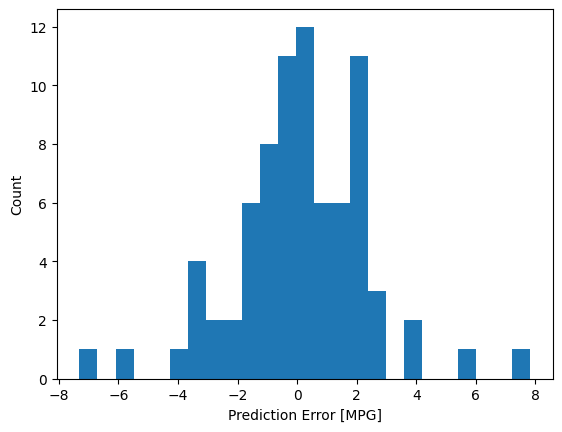

In [53]:
# it appears that the model predicts reasonably well
# now check the error distribution

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [54]:
# if you are happy with your model, then save it for later use with Model.save
dnn_model.save('dnn_model.keras')

In [56]:
# if you reload the model, it gives identical output.

reloaded = tf.keras.models.load_model('dnn_model.keras')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose = 0
)

ValueError: ignored

In [60]:
pd.DataFrame(test_results, index = ['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.649791
linear_model,2.479754
dnn_horsepower_model,2.922305
dnn_model,1.675824
